In [1]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from scipy.stats import randint
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [2]:
class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

all_images = []
all_targets = []

# Loop through dataset adding images and labels intro numpy arrays
for target in os.listdir("dataset"):
    for image_filename in os.listdir("dataset/"+target):
        temp_image = Image.open("dataset/"+target+"/"+image_filename)
        # Decision Tree needs a 2d input, a flattened image is required
        image = np.array(temp_image.resize((256, 256))).flatten()
        all_images.append(image)
        all_targets.append(class_names.index(target))
        print(image.shape)

print(len(all_images))
print(len(all_targets))

(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)


In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(all_images, all_targets, random_state=123, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
# normalize based on possible rgb values scale 0 - 255 -> 0 - 1
X_train = X_train/255
X_test = X_test/255
print(np.min(X_train[0]), np.max(X_train[0]))
print(np.min(X_test[0]), np.max(X_test[0]))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

0.0 0.9882352941176471
0.0 1.0
(3373, 196608)
(844, 196608)
(3373,)
(844,)


In [4]:
model = svm.SVC(random_state=123)
model.fit(X_train, y_train)

SVC(random_state=123)

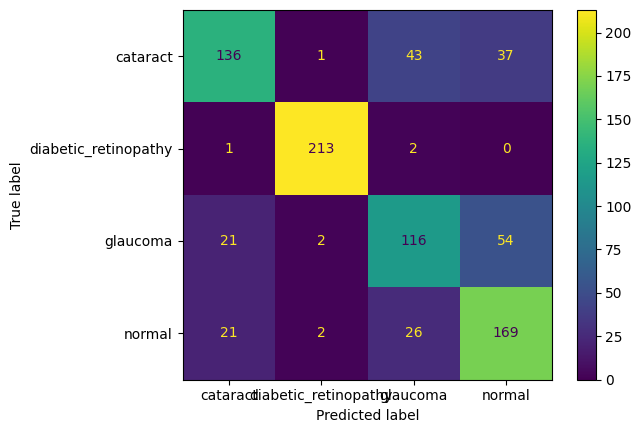

In [5]:

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot();

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Error:", 1-accuracy)
for i, target in enumerate(class_names):
    print(f'{target} Precision: {precision[i]}')
    print(f'{target} Recall: {recall[i]}')
    print(f'{target} F1_Score: {f1[i]}')

Accuracy: 0.7511848341232228
Error: 0.2488151658767772
cataract Precision: 0.7597765363128491
cataract Recall: 0.6267281105990783
cataract F1_Score: 0.6868686868686867
diabetic_retinopathy Precision: 0.9770642201834863
diabetic_retinopathy Recall: 0.9861111111111112
diabetic_retinopathy F1_Score: 0.9815668202764978
glaucoma Precision: 0.6203208556149733
glaucoma Recall: 0.6010362694300518
glaucoma F1_Score: 0.6105263157894737
normal Precision: 0.65
normal Recall: 0.7752293577981652
normal F1_Score: 0.7071129707112971
